In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [15]:
dataset = pd.read_csv('data/train_file.csv')
testing_data = pd.read_csv('data/test_file.csv')

In [16]:
dataset['Source'].replace('^\s+$', np.nan,regex=True,inplace=True)
dataset['Source'].replace('[-_]', '',regex=True,inplace=True)
dataset['Source'].replace('[^\x00-\x7f]', np.nan,regex=True,inplace=True)
dataset = dataset.dropna()
dataset['Source'].isna().sum()

0

In [17]:
#Mathematical summary of dataset
dataset.describe()

,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
count,55643.000000,55643.000000,55643.000000,55643.000000,55643.000000
mean,132.628938,4.567655,14.371367,-0.006157,-0.029442
std,724.733232,21.174962,76.840481,0.137619,0.143181
min,-1.000000,-1.000000,-1.000000,-0.838525,-0.755355
25%,0.000000,0.000000,0.000000,-0.079057,-0.116802
50%,6.000000,0.000000,0.000000,0.000000,-0.027277
75%,37.000000,2.000000,4.000000,0.065057,0.057392
max,49211.000000,1267.000000,3716.000000,0.962354,0.964646


Figure below shows comparison of the social-media parameters for all observed samples 

<AxesSubplot: title={'center': 'Social Media Features Standard Deviation'}>

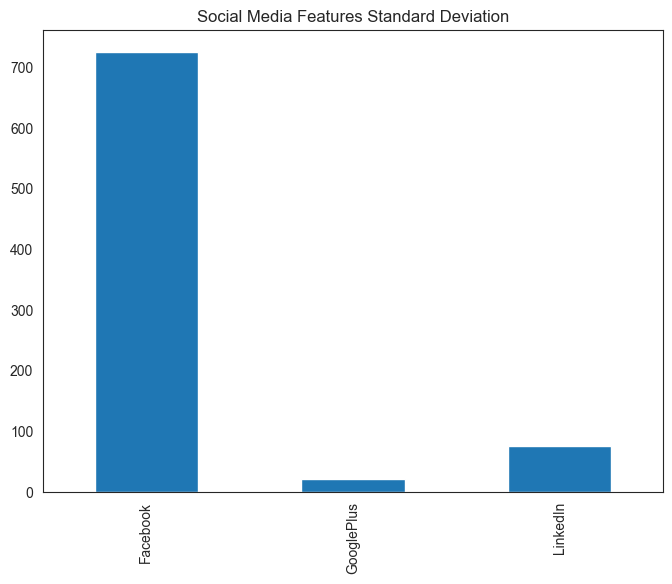

In [48]:
#Standard deviation for all attributes
social_media_features=['Facebook','GooglePlus','LinkedIn']
dataset[social_media_features].std().plot(kind='bar', figsize=(8,6), title="Social Media Features Standard Deviation")

Comparison of SentimentTitle and SentimentHeadline corresponding to their respective entry

<AxesSubplot: >

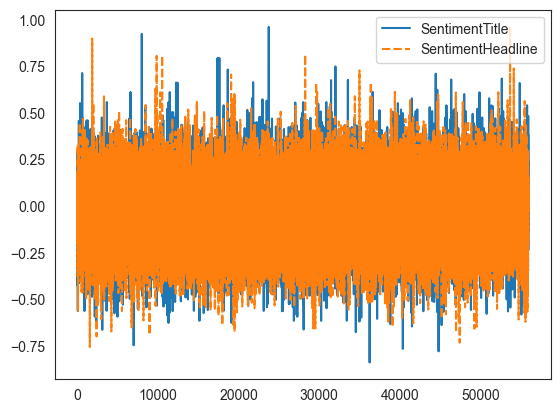

In [32]:
#Comparison of SentimentTitle and SentimentHeadline corresponding to their respective entry
sns.lineplot(data=dataset[['SentimentTitle', 'SentimentHeadline']])

Comparison of Social Media features corresponding to each respective entry

<AxesSubplot: >

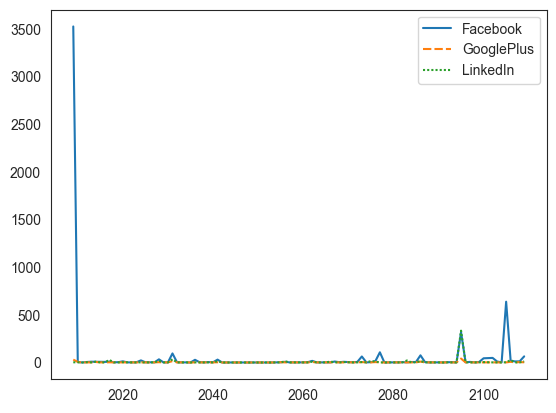

In [34]:
#Comparison of Social Media features corresponding to each respective entry
sns.lineplot(data=dataset[['Facebook','GooglePlus','LinkedIn']][2000:2100])

In [42]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
#     filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Dataset', fontsize=15)
    plt.show()

Correlation matrix:

C:\Users\NeelDandiwala\AppData\Local\Temp\ipykernel_24816\766326479.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


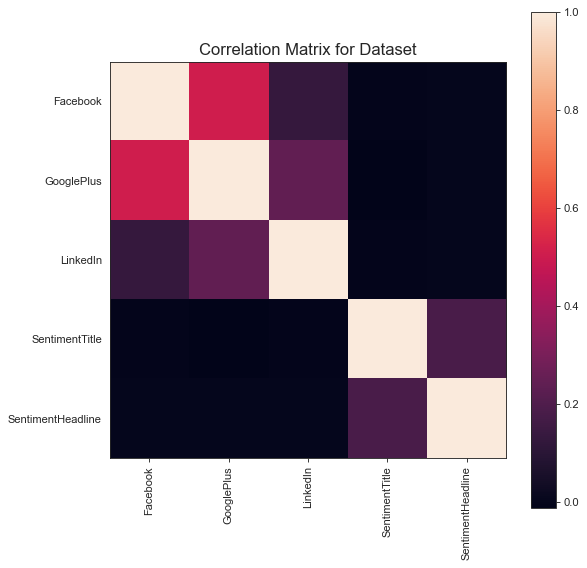

In [43]:
plotCorrelationMatrix(dataset, 8)

In [44]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Scatter and density plots:

C:\Users\NeelDandiwala\AppData\Local\Temp\ipykernel_24816\950191735.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


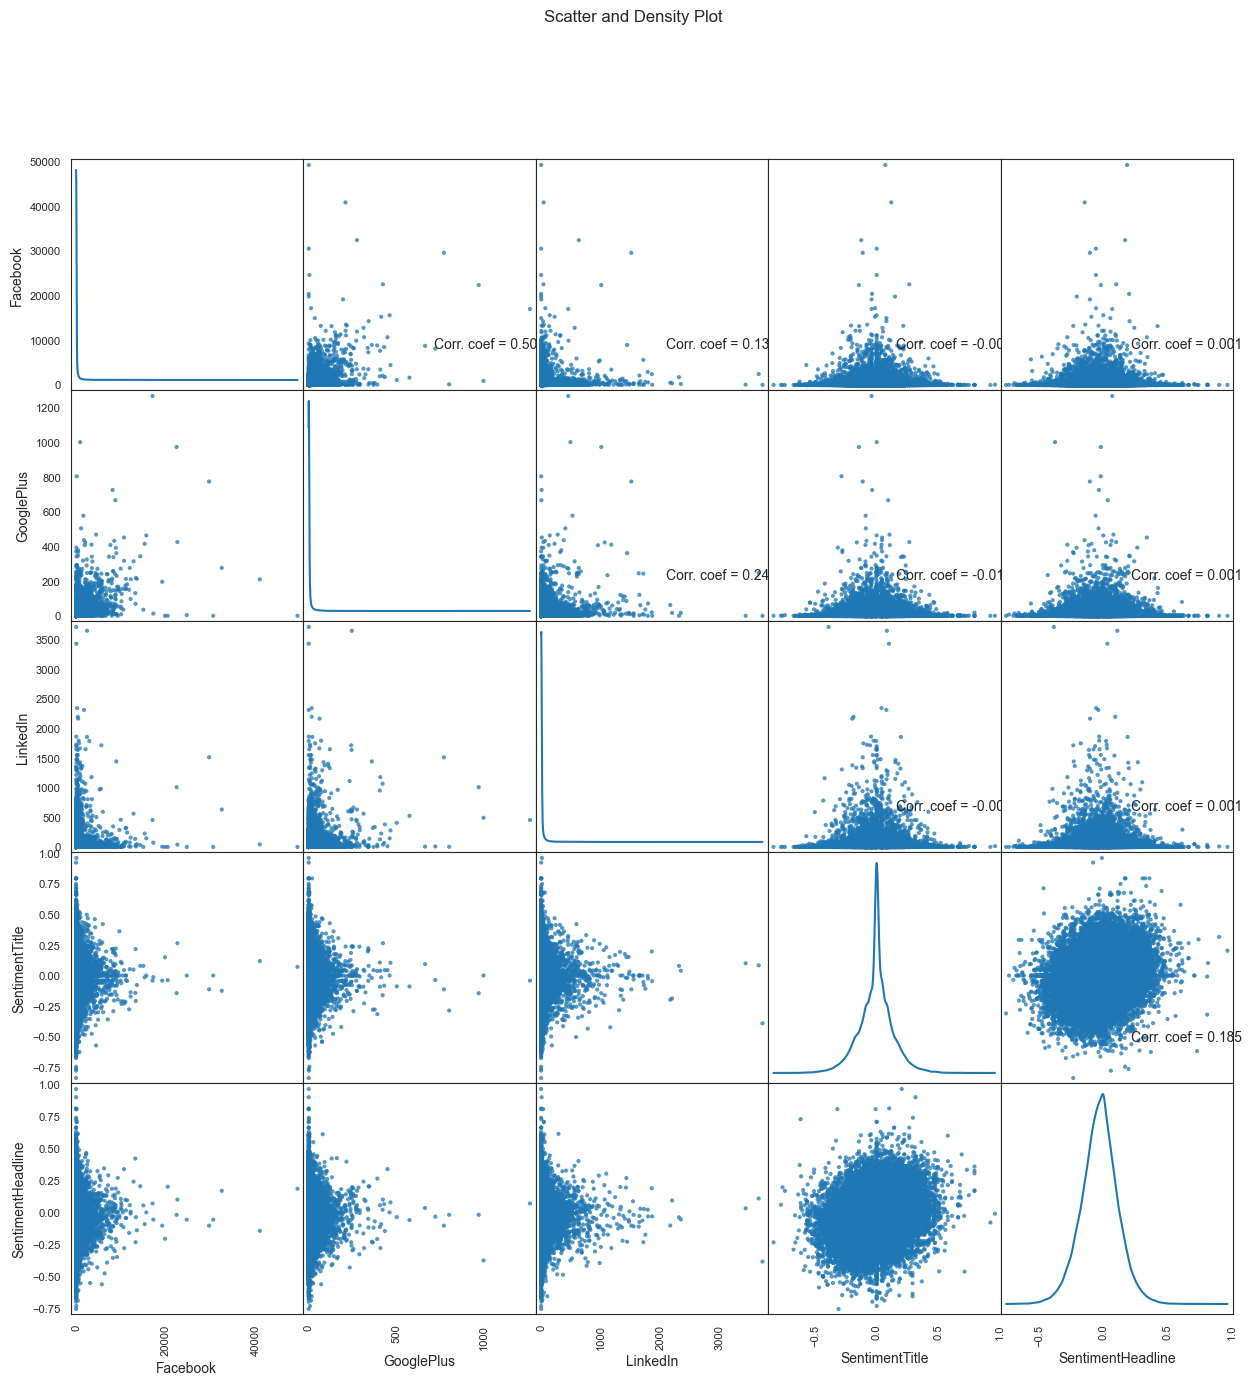

In [46]:
plotScatterMatrix(dataset, 15, 10)